# 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

In [7]:
df = pd.read_csv('temp_new2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517206 entries, 0 to 2517205
Data columns (total 29 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   USER_ID_hash                object
 1   REG_DATE                    object
 2   SEX_ID                      object
 3   AGE                         int64 
 4   Tr_Pref_Name                object
 5   Tr_small_area_name          object
 6   Translated_capsule_text     object
 7   Translated_genre_name       object
 8   VIEW_COUPON_ID_hash         object
 9   usable_date_sum             int64 
 10  view_count                  int64 
 11  PRICE_RATE                  int64 
 12  DISCOUNT_PRICE              int64 
 13  VALIDPERIOD                 int64 
 14  DISPPERIOD                  int64 
 15  PURCHASE_FLG                int64 
 16  dispfrom                    object
 17  dispend                     object
 18  usable_date_mon             int64 
 19  usable_date_tue             int64 
 20  us

# 결측치 확인 및 제거

In [8]:
df.isnull().sum()

USER_ID_hash                       0
REG_DATE                           0
SEX_ID                             0
AGE                                0
Tr_Pref_Name                  483322
Tr_small_area_name                 0
Translated_capsule_text            0
Translated_genre_name              0
VIEW_COUPON_ID_hash                0
usable_date_sum                    0
view_count                         0
PRICE_RATE                         0
DISCOUNT_PRICE                     0
VALIDPERIOD                        0
DISPPERIOD                         0
PURCHASE_FLG                       0
dispfrom                           0
dispend                            0
usable_date_mon                    0
usable_date_tue                    0
usable_date_wed                    0
usable_date_thu                    0
usable_date_fri                    0
usable_date_sat                    0
usable_date_sun                    0
usable_date_holiday                0
usable_date_before_holiday         0
M

In [9]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

USER_ID_hash                  0
REG_DATE                      0
SEX_ID                        0
AGE                           0
Tr_Pref_Name                  0
Tr_small_area_name            0
Translated_capsule_text       0
Translated_genre_name         0
VIEW_COUPON_ID_hash           0
usable_date_sum               0
view_count                    0
PRICE_RATE                    0
DISCOUNT_PRICE                0
VALIDPERIOD                   0
DISPPERIOD                    0
PURCHASE_FLG                  0
dispfrom                      0
dispend                       0
usable_date_mon               0
usable_date_tue               0
usable_date_wed               0
usable_date_thu               0
usable_date_fri               0
usable_date_sat               0
usable_date_sun               0
usable_date_holiday           0
usable_date_before_holiday    0
Male                          0
Female                        0
dtype: int64

# 데이터 전처리

In [12]:
COL_DEL=['USER_ID']
COL_NUM=['AGE', 'usable_date_sum', 'view_count', 'PRICE_RATE', 'DISCOUNT_PRICE', 'VALIDPERIOD', 'usable_date_mon',
         'usable_date_tue','usable_date_wed','usable_date_thu','usable_date_fri','usable_date_sat','usable_date_sun','usable_date_holiday',
        'usable_date_before_holiday']
COL_CAT=['SEX_ID','Tr_Pref_Name','Tr_small_area_name','Translated_capsule_text','Translated_genre_name']
COL_Y=['PURCHASE_FLG']

In [13]:
label_encoder = LabelEncoder()
for col in COL_CAT:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head()

,USER_ID_hash,REG_DATE,SEX_ID,AGE,Tr_Pref_Name,Tr_small_area_name,Translated_capsule_text,Translated_genre_name,VIEW_COUPON_ID_hash,usable_date_sum,...,usable_date_tue,usable_date_wed,usable_date_thu,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday,Male,Female
0,6e42647e1ff27fa2a1629fa5c5888105,2010-11-07 16:55:41 UTC,0,29,16,22,16,9,000fb2d3790cd8860e337290db189abe,0,...,0,0,0,0,0,0,0,0,0,1
1,3e3d52965653c15caa2fc52741c3e3a4,2011-05-13 19:59:22 UTC,0,49,38,22,16,9,000fb2d3790cd8860e337290db189abe,0,...,0,0,0,0,0,0,0,0,0,1
2,05101ccb6e755c85319a8e73e54eed51,2010-11-24 17:39:50 UTC,1,30,19,22,16,9,000fb2d3790cd8860e337290db189abe,0,...,0,0,0,0,0,0,0,0,1,0
3,ffb688037381369f52268077d3941123,2011-02-23 00:31:21 UTC,0,65,27,22,16,9,000fb2d3790cd8860e337290db189abe,0,...,0,0,0,0,0,0,0,0,0,1
4,e7dc75e25b66b871db735892ab91ce5e,2010-09-19 11:06:42 UTC,0,44,38,22,16,9,000fb2d3790cd8860e337290db189abe,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
scaler = StandardScaler()
df[COL_NUM] = scaler.fit_transform(df[COL_NUM])
df

,USER_ID_hash,REG_DATE,SEX_ID,AGE,Tr_Pref_Name,Tr_small_area_name,Translated_capsule_text,Translated_genre_name,VIEW_COUPON_ID_hash,usable_date_sum,...,usable_date_tue,usable_date_wed,usable_date_thu,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday,Male,Female
0,6e42647e1ff27fa2a1629fa5c5888105,2010-11-07 16:55:41 UTC,0,-1.698946,16,22,16,9,000fb2d3790cd8860e337290db189abe,-1.219794,...,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367,0,1
1,3e3d52965653c15caa2fc52741c3e3a4,2011-05-13 19:59:22 UTC,0,0.115638,38,22,16,9,000fb2d3790cd8860e337290db189abe,-1.219794,...,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367,0,1
2,05101ccb6e755c85319a8e73e54eed51,2010-11-24 17:39:50 UTC,1,-1.608216,19,22,16,9,000fb2d3790cd8860e337290db189abe,-1.219794,...,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367,1,0
3,ffb688037381369f52268077d3941123,2011-02-23 00:31:21 UTC,0,1.567305,27,22,16,9,000fb2d3790cd8860e337290db189abe,-1.219794,...,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367,0,1
4,e7dc75e25b66b871db735892ab91ce5e,2010-09-19 11:06:42 UTC,0,-0.338008,38,22,16,9,000fb2d3790cd8860e337290db189abe,-1.219794,...,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517200,d46307b18c64e32919b7f81ab255850c,2010-09-23 06:55:50 UTC,0,2.020951,10,4,1,11,ec41335c6b0dd0838bff677462745095,0.938222,...,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781,0,1
2517202,a33a791c721c25a841273d2dc66c7a2c,2012-02-15 20:34:22 UTC,1,0.206367,12,4,1,11,ec41335c6b0dd0838bff677462745095,0.938222,...,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781,1,0
2517203,3ac7574580cab462f3eee6714e1ab73d,2010-11-08 20:58:05 UTC,0,0.024909,10,4,1,11,ec41335c6b0dd0838bff677462745095,0.938222,...,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781,0,1
2517204,6ffa64b6c14b29302f51371361e57053,2010-09-08 19:28:05 UTC,1,-0.700925,10,4,1,11,ec41335c6b0dd0838bff677462745095,0.938222,...,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781,1,0


In [16]:
df_dropped = df.drop(['USER_ID_hash','REG_DATE','VIEW_COUPON_ID_hash','dispfrom','dispend','Male','Female'],axis = 1)

In [17]:
df_dropped

,SEX_ID,AGE,Tr_Pref_Name,Tr_small_area_name,Translated_capsule_text,Translated_genre_name,usable_date_sum,view_count,PRICE_RATE,DISCOUNT_PRICE,...,PURCHASE_FLG,usable_date_mon,usable_date_tue,usable_date_wed,usable_date_thu,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday
0,0,-1.698946,16,22,16,9,-1.219794,-0.030213,1.648255,-0.495368,...,0,-1.186163,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367
1,0,0.115638,38,22,16,9,-1.219794,-0.030213,1.648255,-0.495368,...,0,-1.186163,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367
2,1,-1.608216,19,22,16,9,-1.219794,-0.030213,1.648255,-0.495368,...,0,-1.186163,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367
3,0,1.567305,27,22,16,9,-1.219794,-0.030213,1.648255,-0.495368,...,0,-1.186163,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367
4,0,-0.338008,38,22,16,9,-1.219794,-0.030213,1.648255,-0.495368,...,0,-1.186163,-1.203751,-1.222565,-1.22912,-1.178961,-1.043095,-1.074367,-1.074367,-1.074367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517200,0,2.020951,10,4,1,11,0.938222,-0.156250,-0.668379,1.493189,...,0,0.843054,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781
2517202,1,0.206367,12,4,1,11,0.938222,-0.156250,-0.668379,1.493189,...,0,0.843054,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781
2517203,0,0.024909,10,4,1,11,0.938222,-0.156250,-0.668379,1.493189,...,0,0.843054,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781
2517204,1,-0.700925,10,4,1,11,0.938222,-0.156250,-0.668379,1.493189,...,0,0.843054,0.830736,0.817952,0.81359,0.848205,0.958685,0.930781,0.930781,0.930781


# Rogistic Regression

In [18]:
X = df_dropped.drop('PURCHASE_FLG',axis = 1)
y = df_dropped['PURCHASE_FLG']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [19]:
model = LogisticRegression(penalty = 'l1', C=0.5, solver = 'liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print(accuracy)

0.9526640809486149


In [21]:
model = LogisticRegression(penalty = 'l1', C=0.5, solver = 'liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9529947588033421


In [22]:
confusion_matrix(y_test, y_pred)

array([[581485,      0],
       [ 28681,      0]], dtype=int64)

In [23]:
classification_report = classification_report(y_test, y_pred)
print('분류 보고서:\n', classification_report)

C:\Users\hoon\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hoon\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


분류 보고서:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98    581485
           1       0.00      0.00      0.00     28681

    accuracy                           0.95    610166
   macro avg       0.48      0.50      0.49    610166
weighted avg       0.91      0.95      0.93    610166



C:\Users\hoon\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


![accuracy](./accuracy.png)

# 오버 샘플링

In [24]:
oversampler = RandomOverSampler(random_state = 42)

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

model = LogisticRegression(penalty = 'l1', C=0.5, solver = 'liblinear')
model.fit(X_train_oversampled, y_train_oversampled)

y_pred_ = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.6056827158510962


In [25]:
confusion_matrix(y_test, y_pred)

array([[351895, 229590],
       [ 11009,  17672]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
classification_report_over = classification_report(y_test, y_pred)
print('분류 보고서:\n',classification_report_over)

분류 보고서:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75    581485
           1       0.07      0.62      0.13     28681

    accuracy                           0.61    610166
   macro avg       0.52      0.61      0.44    610166
weighted avg       0.93      0.61      0.72    610166



![over](./accuracy_oversampling.png)

#### 점수는 떨어졌지만 구매라고 예측한 데이터가 늘어났음으로 유의미하다 판단했다.


# Feature Coefficients

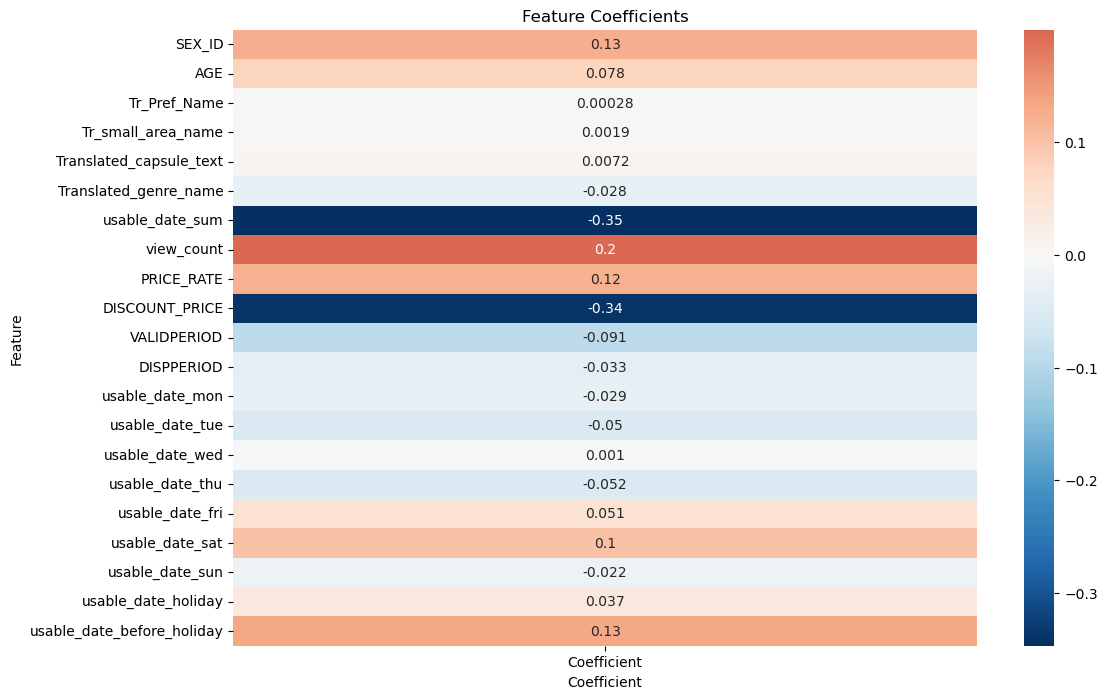

In [38]:
# 로지스틱 회귀 모델에서 계수(coefficient) 얻기
coefficients = model.coef_[0]

# 피처 이름과 계수를 매칭하는 딕셔너리 생성
feature_coefficients = dict(zip(X.columns, coefficients))

# 계수를 데이터프레임으로 변환
df_coefficients = pd.DataFrame.from_dict(feature_coefficients, orient='index', columns=['Coefficient'])

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(df_coefficients, annot=True, cmap='RdBu_r', center=0)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

#### 피쳐 계수를 먼저 확인해보고 유의미한 컬럼들을 도출하거나 조합하는 식으로 접근했으면 어땠을까?

# 최적의 하이퍼 파라미터

In [39]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보들 정의
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1.0],
    'solver': ['liblinear', 'saga']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# 그리드 서치 수치
grid_search.fit(X_train_oversampled, y_train_oversampled)

# 최적의 하이퍼파라미터와 정확도 dt출력
print('최적 하이퍼파라미터:', grid_search.best_params_)
print('최고 정확도:', grid_search.best_score_)

최적 하이퍼파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
최고 정확도: 0.6124586658802278
